# Project Name - Hotel Booking Analysis

**Project Type** - EDA

**Contribution** - Individual

**Name** - Parvej

# GitHub Link -

[link text](https://)https://github.com/parvej3929/EDA-Capstone-Project--Hotel-Booking-Analysis

#Problem Statement

Have you ever wondered when the best time of year to book a
hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# mouting the drive so we can access tha data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data file from drive
Hotel_booking_df = pd.read_csv('/content/drive/MyDrive/Data set/Copy of Hotel Bookings.csv')

In [ ]:
# Let us check the data
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


There are 119390 rows and 32 columns.


In [ ]:
# Lets check the columns
list(Hotel_booking_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Creating a copy of original dataset so that oringinal remains unchanged
Hotel_df = Hotel_booking_df.copy()

### Renaming the 'adr' column to 'average_daily_rate' for better understanding

In [ ]:
Hotel_df.rename(columns = {'adr':'average_daily_rate'}, inplace = True)

In [ ]:
# Overview the data to know about null values and data types of columns.
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Above we can see various columns with null values, So lets find them.

In [ ]:
Hotel_df.isna().sum().sort_values(ascending = False)[ : 6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

#### Here culumns 'company', 'agent', 'country' and 'children' have null values.We have need to replace missing values.

In [ ]:
Hotel_df['children'].fillna(Hotel_df.children.mean(), inplace = True) # filling null values with mean of 'children' column.
Hotel_df['children'] = Hotel_df['children'].astype(int)               # converting data type of 'children' column to int.
#-----------------------------------------------------

Hotel_df['company'].fillna(0, inplace = True)                         # filling null values with 0 for 'company' column.
Hotel_df['company'] = Hotel_df['company'].astype(int)                 # converting data type of 'company' column to int.
#-----------------------------------------------------

Hotel_df['agent'].fillna(0, inplace = True)                           # filling null values with 0 for 'agent' column.
Hotel_df['agent'] = Hotel_df['agent'].astype(int)                     # converting data type of 'agent' column to int.
#-----------------------------------------------------

Hotel_df['country'].fillna('other', inplace = True)                   # filling null values with 'other' for 'country' column.
#-----------------------------------------------------

#### Removing duplicates rows.


In [ ]:
Hotel_df[Hotel_df.duplicated].shape

(31994, 32)

In [ ]:
Hotel_df.drop_duplicates(inplace = True)

#### Now as we can see there is no null values.


In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [ ]:
Hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87396.0,0.138633,0.455871,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


There are some rows with total no. of adults, children and babies equal to zero.So we have to remove such rows.

In [ ]:
# Removing the rows where the total no. of adults, children and babies is zero.
Hotel_df.drop(Hotel_df[Hotel_df.adults + Hotel_df.children + Hotel_df.babies == 0].index, inplace = True)

#### Removing outliers and add some new columns

Adding columns

In [ ]:
Hotel_df['Kids'] = Hotel_df['children'] + Hotel_df['babies']
Hotel_df['Full_stay'] = Hotel_df.stays_in_week_nights + Hotel_df.stays_in_weekend_nights
Hotel_df['Total_members'] = Hotel_df.children + Hotel_df.babies + Hotel_df.adults

####Removing outliers

Removing outlier from 'average_daily_rate' column

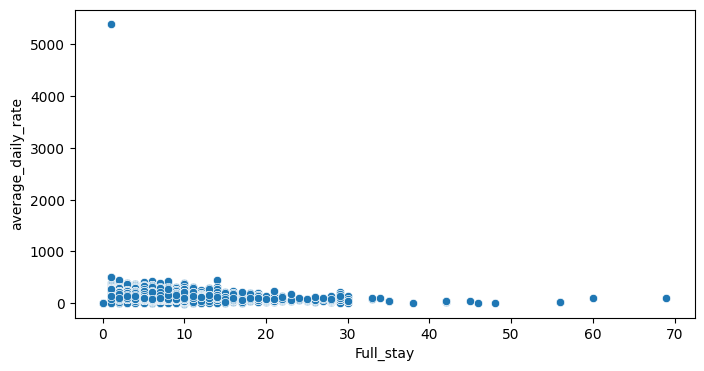

In [ ]:

plt.figure(figsize = (8,4))
sns.scatterplot(y = 'average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

In [ ]:
# Removing all values greater than 5000.
Hotel_df.drop(Hotel_df[Hotel_df.average_daily_rate >= 5000].index, inplace = True)


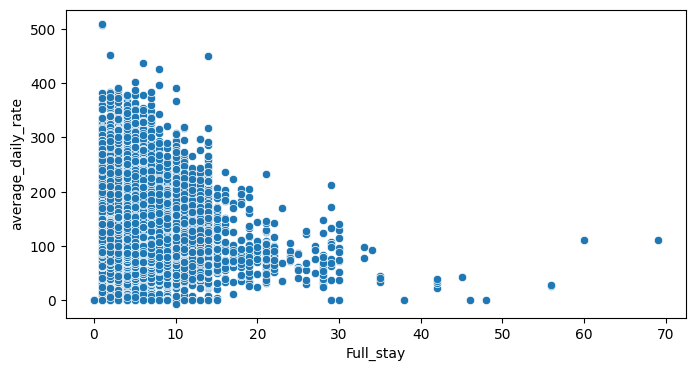

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(y = 'average_daily_rate', x = 'Full_stay', data = Hotel_df)
plt.show()

From the above graph we have conclude that as length of full stay increasing the average daily rate decreses.This means for longer stay better deal for customer can be finalised.

Removing outliers from 'stays_in_weekend_nights' and 'stays_in_week_nights'.

In [ ]:
Hotel_df.stays_in_weekend_nights.value_counts()

0     35057
2     26376
1     22646
4      1726
3      1143
6       112
5        68
8        58
7        15
9         9
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

In [ ]:
Hotel_df.loc[Hotel_df.stays_in_weekend_nights >= 5, 'stays_in_weekend_nights'] = 5

In [ ]:
Hotel_df.stays_in_week_nights.value_counts()

1     22172
2     20730
3     16242
5      9654
4      7857
0      6112
6      1375
10      966
7       962
8       611
9       216
15       68
11       49
12       40
20       39
13       27
14       25
19       20
21       15
16       12
22        7
25        6
18        6
30        4
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: stays_in_week_nights, dtype: int64

In [ ]:
# Greater that 10 stays are assigned to 10 stays.
Hotel_df.loc[Hotel_df.stays_in_week_nights >= 10,'stays_in_week_nights'] = 10

Remove outliers from 'Total_members'




In [ ]:
Hotel_df.Total_members.value_counts()

2     57056
1     16072
3     10078
4      3870
5       136
26        5
12        2
27        2
20        2
10        2
40        1
50        1
55        1
6         1
Name: Total_members, dtype: int64

In [ ]:
# Greater than 20 members are assigned to 20 members.
Hotel_df.loc[Hotel_df.Total_members >= 20, 'Total_members'] = 20

Lets first find the correlation between the numerical data. Also, we have added Full_stay and Total_members columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87229 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87229 non-null  object 
 1   is_canceled                     87229 non-null  int64  
 2   lead_time                       87229 non-null  int64  
 3   arrival_date_year               87229 non-null  int64  
 4   arrival_date_month              87229 non-null  object 
 5   arrival_date_week_number        87229 non-null  int64  
 6   arrival_date_day_of_month       87229 non-null  int64  
 7   stays_in_weekend_nights         87229 non-null  int64  
 8   stays_in_week_nights            87229 non-null  int64  
 9   adults                          87229 non-null  int64  
 10  children                        87229 non-null  int64  
 11  babies                          87229 non-null  int64  
 12  meal                           

In [ ]:
Correlation_df = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','average_daily_rate','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

In [ ]:
Correlation_mat = Correlation_df.corr()

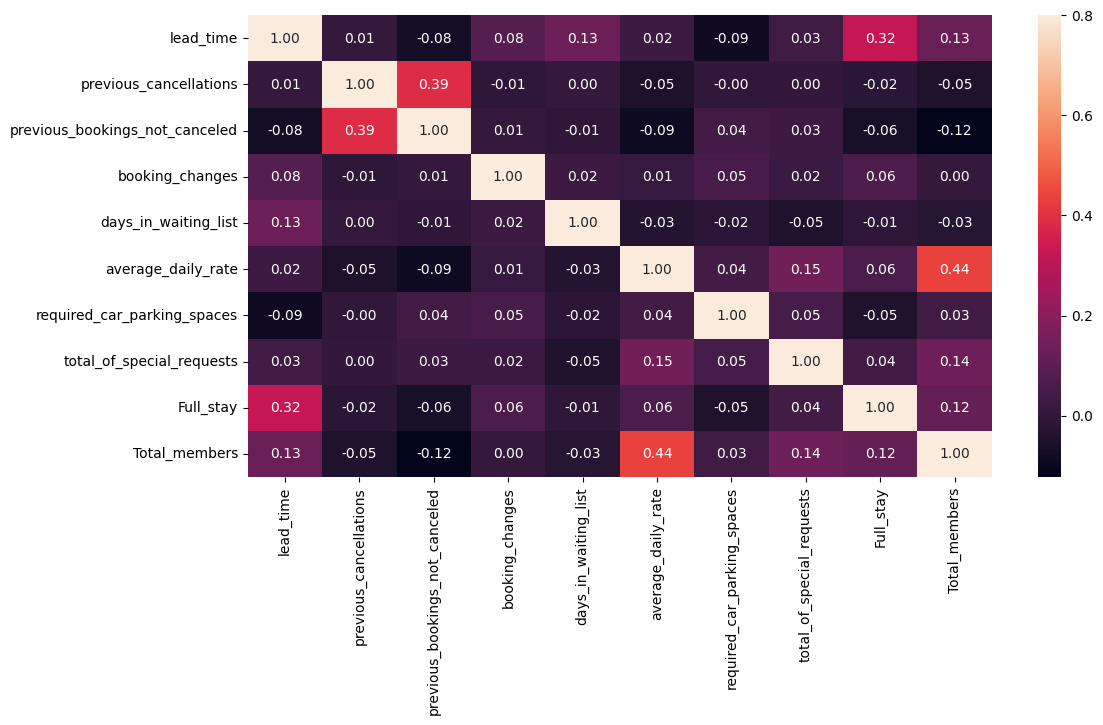

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(Correlation_mat, annot = True, vmax = 0.8, fmt = '.2f')
plt.show()

1--> Full_stay and lead_time have slight correlation.Means that for longer hotel stay people plan earlier.

2-->  Average_daily_rate is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

#EDA

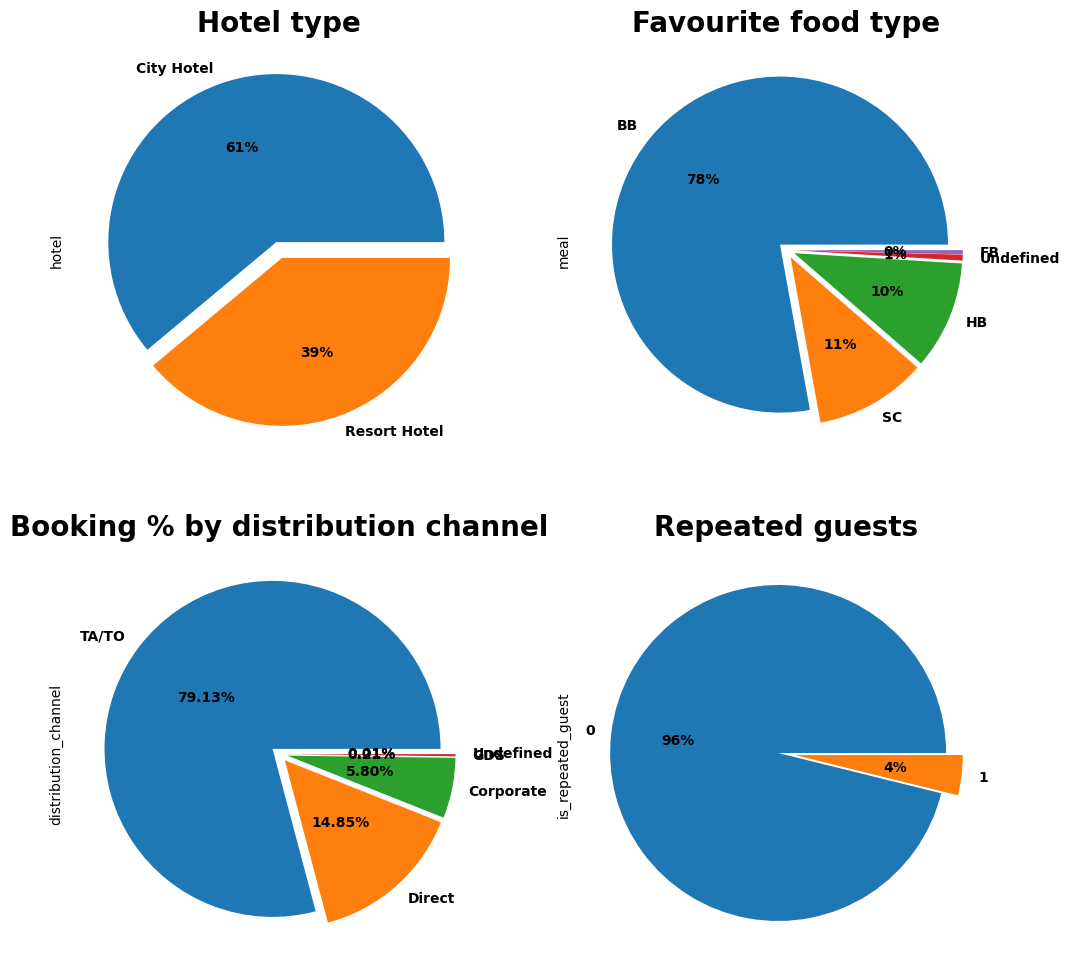

In [ ]:
plt.subplot(2,2,1)
Hotel_typ = Hotel_df['hotel'].value_counts()
Hotel_typ.plot.pie(x='City Hotel', y ='Resort Hotel',autopct='%1.0f%%',textprops={'weight': 'bold'}, figsize =(12,12),explode =[0.05]*2)
plt.title('Hotel type',fontweight="bold", size=20)

#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,2)
meal_typ =Hotel_df['meal'].value_counts()
meal_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'}, explode = [0.05]*5)
plt.title('Favourite food type',fontweight="bold", size=20)
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,3)
booking_distibution_typ =Hotel_df['distribution_channel'].value_counts()
booking_distibution_typ.plot.pie(autopct='%.2f%%',textprops={'weight': 'bold'}, pctdistance=0.5,explode = [0.05]*5)
plt.title('Booking % by distribution channel', fontweight ='bold', size =20);
#--------------------------------------------------------------------------------------------------#
plt.subplot(2,2,4)
Repeated = Hotel_df.is_repeated_guest .value_counts()
Repeated.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'},explode = [0.05]*2)
plt.title('Repeated guests', fontweight ='bold', size =20);
#--------------------------------------------------------------------------------------------------#

1-->As we can see 61% are city hotels and 39% are resort hotels

2-->BB --bed and breakfast, HB--half board (in which breakfast and dinner are included.), FB--full board (in which breakfast, lunch and dinner are included.). AS we can see 78% of people prefer 'BB' type meal.

3-->Most 79% people prefer'TA/TO' for booking

4-->only 4% people are repeated guests. The guest retention rate is very low.

Text(0.5, 1.0, 'required_parking_spaces')

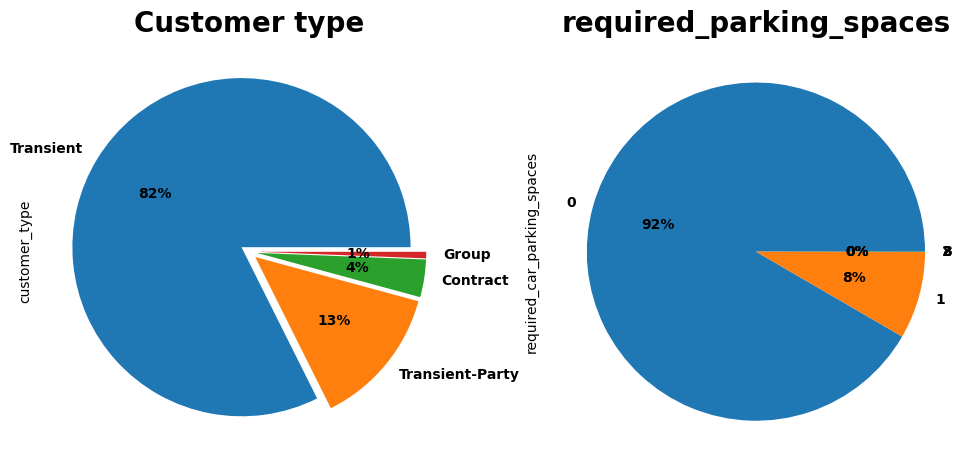

In [ ]:
Hotel_df.customer_type.nunique()
Customer_typ = Hotel_df.customer_type .value_counts()
plt.figure(figsize =(12,12))
plt.subplot(1,2,1 )
Customer_typ.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'}, explode =[0.05]*4)
plt.title('Customer type',fontweight="bold", size=20)
#---------------------------------------------------------------------------------------------------#
plt.subplot(1,2,2)
Car_parking_spaces = Hotel_df.required_car_parking_spaces.value_counts()
Car_parking_spaces.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('required_parking_spaces',fontweight="bold", size=20)

1-->There are 4 types of Customer. Out of them most are Transient Type.

2-->only 8% people require parking spaces.

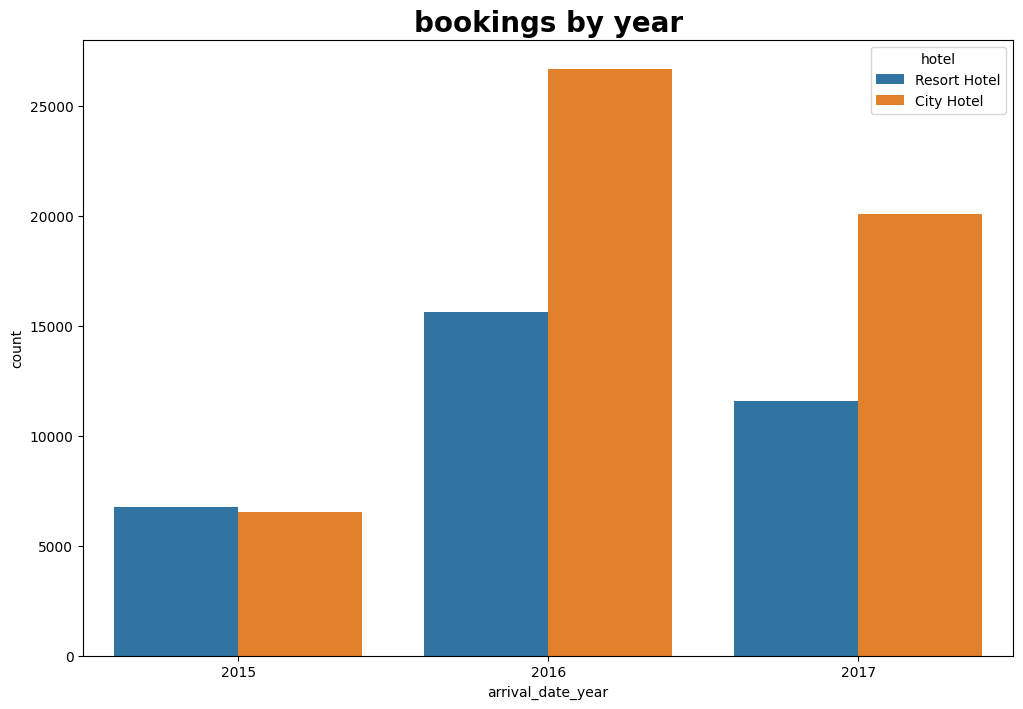

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Hotel_df['arrival_date_month'] = pd.Categorical(Hotel_df['arrival_date_month'], categories = months, ordered = True)
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_year', data= Hotel_df, hue= 'hotel').set_title ('bookings by year',fontweight= "bold", size=20)
plt.show()

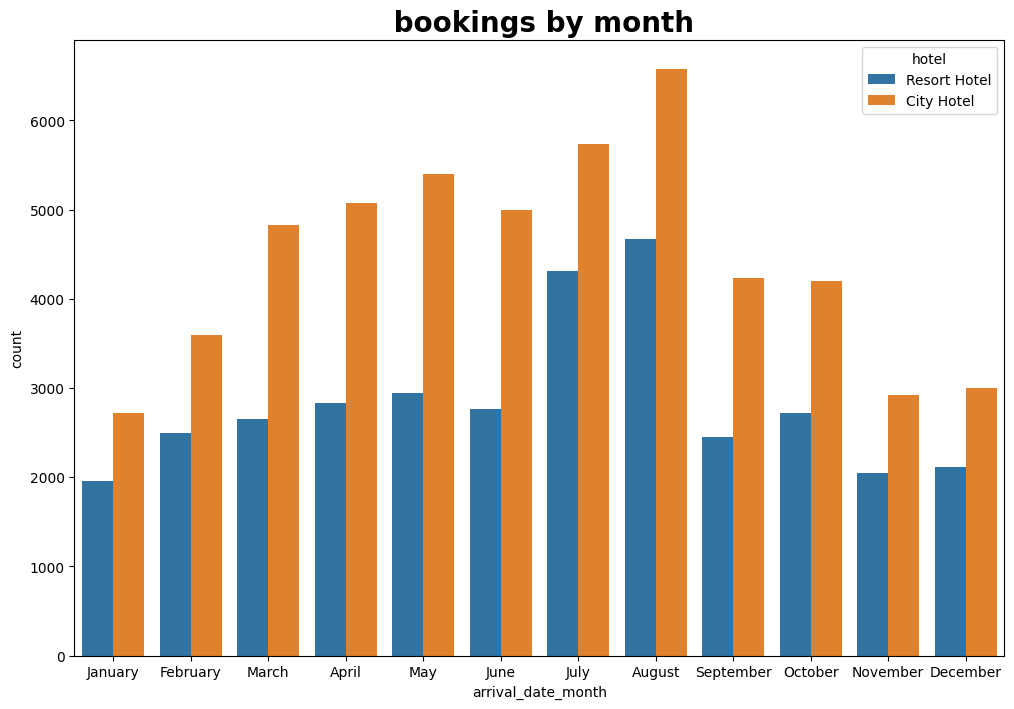

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'arrival_date_month', data= Hotel_df, hue= 'hotel').set_title (' bookings by month',fontweight="bold", size=20)
plt.show()

1-->Bookings for city hotels are higher than resort hotels over the years and in year 2016 the bookings for both the hotels were maximum.

2-->Most bookings were done in the month of May,June, July, August.

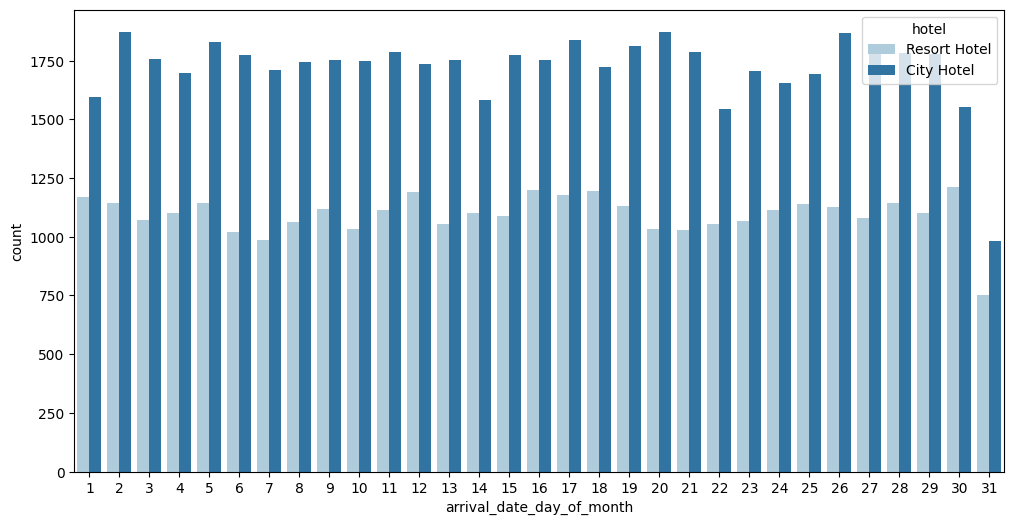

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data = Hotel_df, x = 'arrival_date_day_of_month', hue='hotel', palette='Paired')
plt.show()

we can see less no. of arrivals are at the month end.

In [ ]:
# Creating subsets for city and resort dataframe.
City_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='City Hotel'])
Resort_df =pd.DataFrame(Hotel_df[Hotel_df['hotel'] =='Resort Hotel'])

In [ ]:
X = Resort_df['arrival_date_month'].value_counts().reset_index()
X.columns = ['month', 'no.of guests']
X

,month,no.of guests
0,August,4666
1,July,4313
2,May,2942
3,April,2828
4,June,2759
5,October,2724
6,March,2656
7,February,2492
8,September,2450
9,December,2114


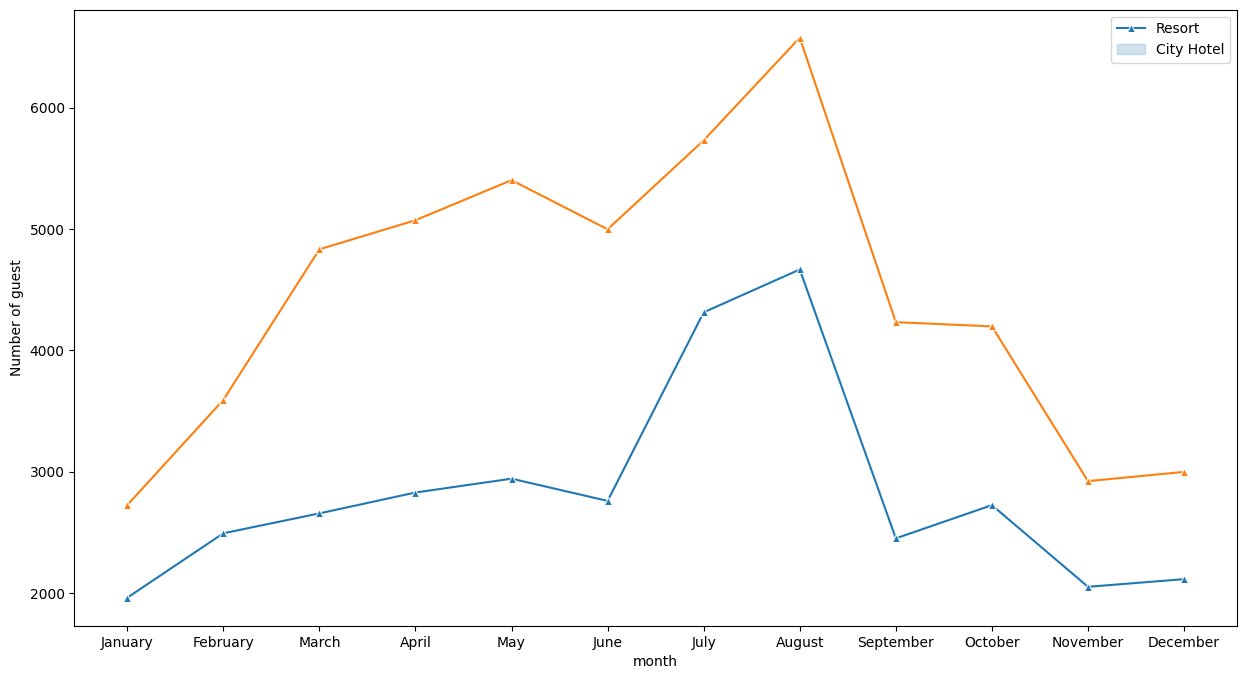

In [ ]:
resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest = resort_guest.merge(city_guest, on = 'month')                              #merge resort guest and city guest month wise
final_guest.columns = ['month','no of guests in resort','no of guest in city hotel']
final_guest
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

#Which month get most visitors?
plt.figure(figsize =(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker ='^')
sns.lineplot(data=final_guest, x='month', y='no of guest in city hotel',marker ='^')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Number of guest')
plt.show()

# From Where the most guests are coming?

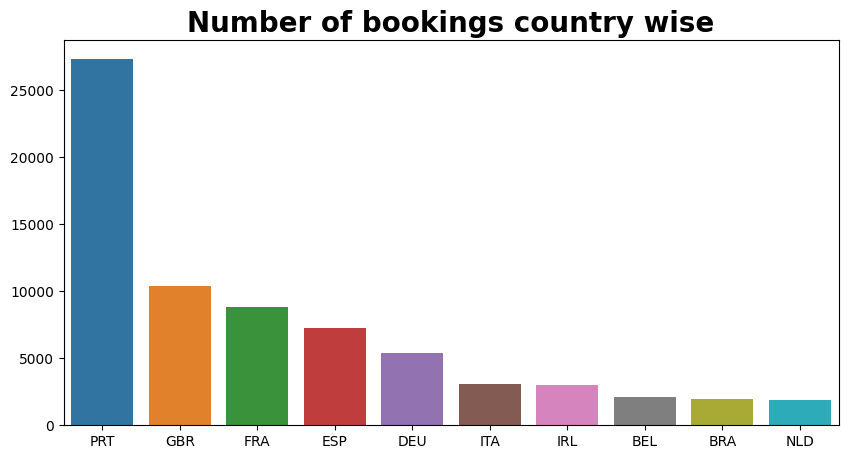

In [ ]:
plt.figure(figsize = (10,5))

sns.barplot (y= list(Hotel_df.country.value_counts().head (10)), x= list(Hotel_df.country.value_counts().head(10).index))
plt.title("Number of bookings country wise",fontweight="bold", size=20)
plt.show()

Most guest are from Portugal and other Europian contries.

# Adults and kids

In [ ]:
Hotel_df['Total_members']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: Total_members, Length: 87229, dtype: int64

In [ ]:
Hotel_df['Total_members']

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: Total_members, Length: 87229, dtype: int64

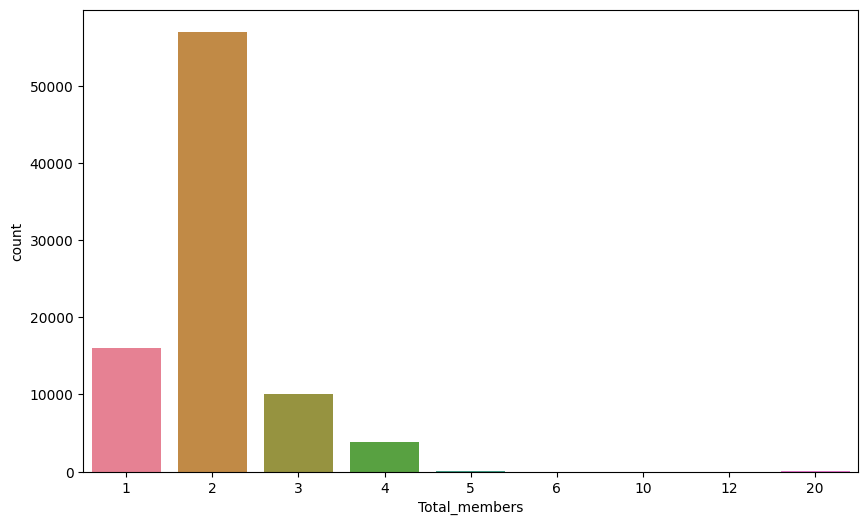

In [ ]:
Hotel_df.loc[Hotel_df.Total_members > 20, 'Total_members'] = 20   #removing outlier from Total_members column
plt.figure(figsize=(10,6))
sns.countplot(data = Hotel_df, x = 'Total_members', palette='husl')
plt.show()

Most guests prefer to come as pair of 2 Adults.

# Which agent made the maximum bookings?

Text(0.5, 1.0, 'No. of bookings done by agents')

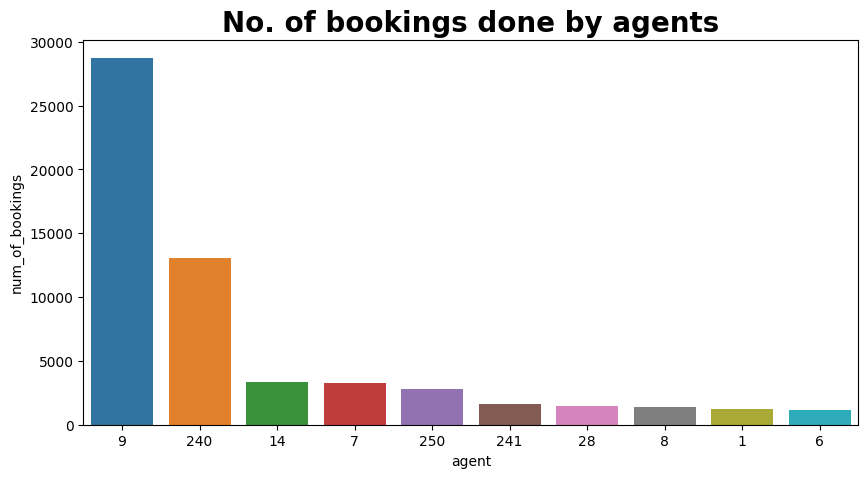

In [ ]:
agent_df = pd.DataFrame(Hotel_df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
agent_df.drop(agent_df[agent_df['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
agent_df = agent_df[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = agent_df, order = agent_df.sort_values('num_of_bookings' ,ascending = False).agent)
plt.title( 'No. of bookings done by agents',fontweight="bold", size=20)

Agent no. 9 has made most no. of bookings.



# Most preferred Room type

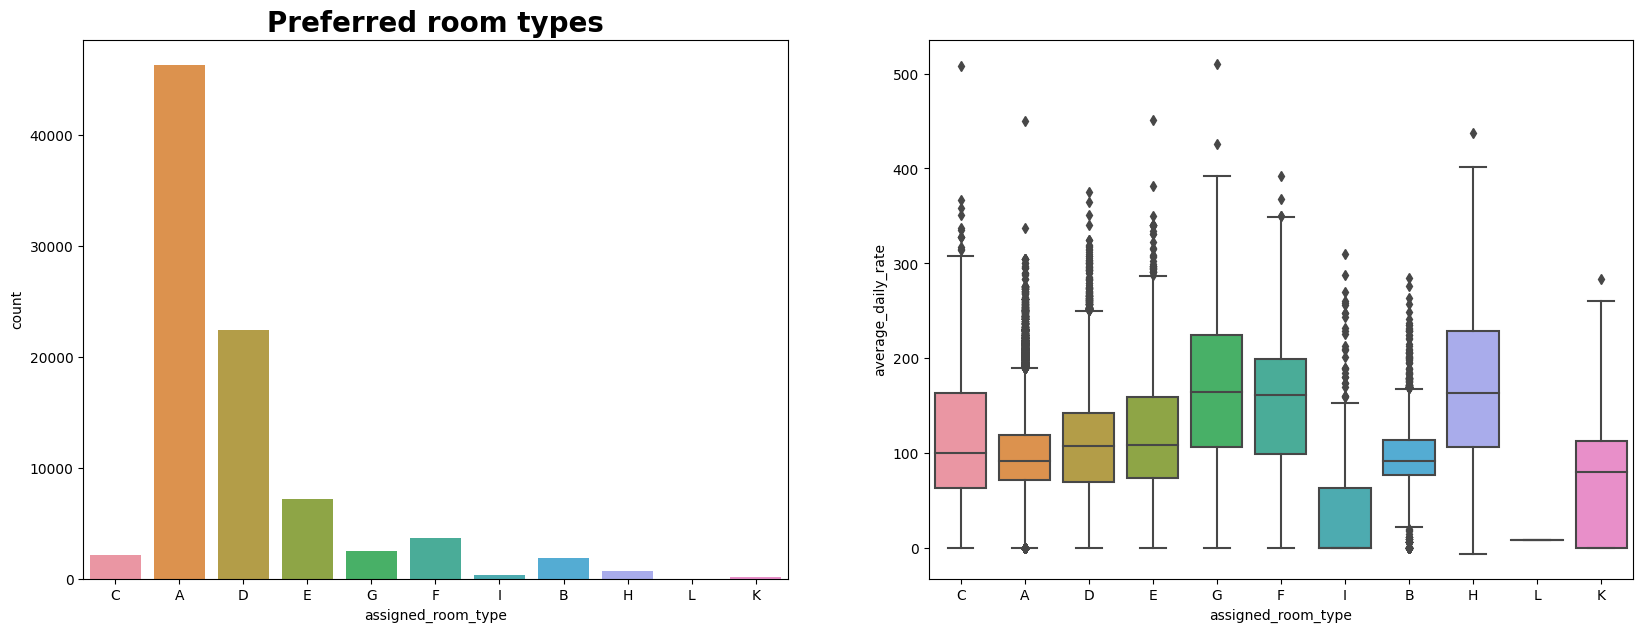

In [ ]:
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.countplot( x = Hotel_df['assigned_room_type'])
plt.title('Preferred room types',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.boxplot(x = Hotel_df['assigned_room_type'], y = Hotel_df['average_daily_rate'])
plt.show()

Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.

# Stay_length in hotels

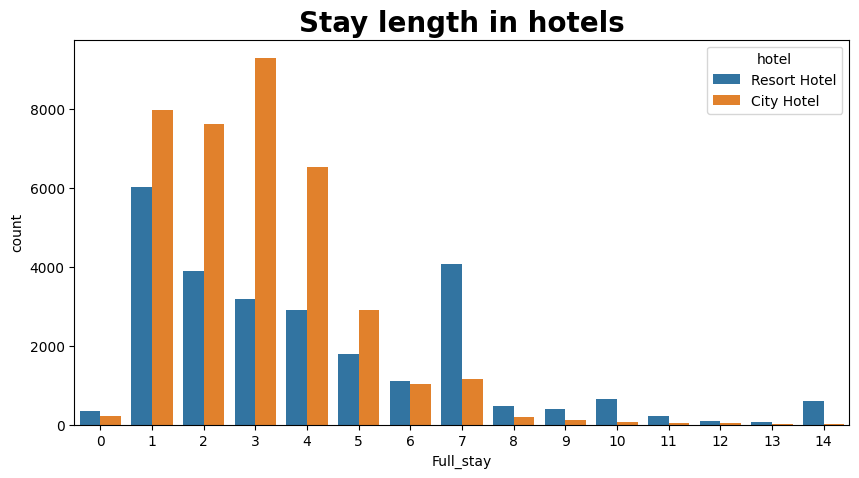

In [ ]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontweight="bold", size=20)
plt.show()

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

Text(0.5, 1.0, 'Number of stays on weekday nights')

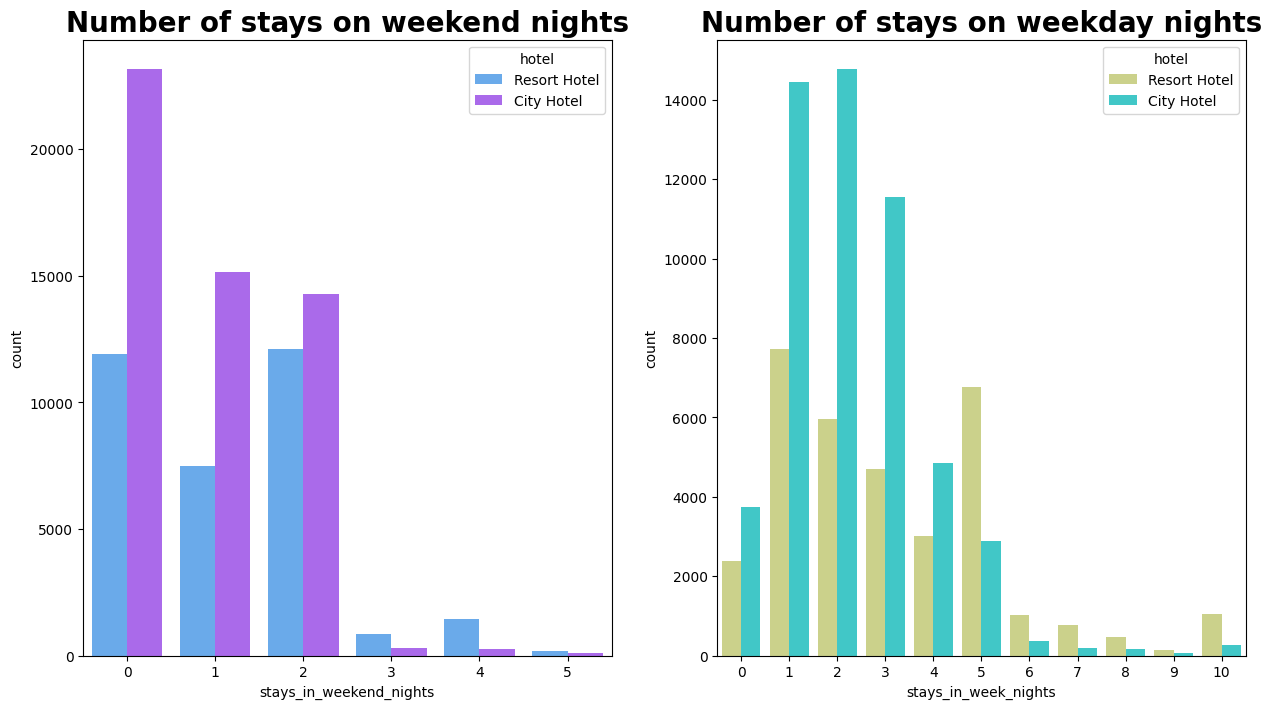

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=Hotel_df, palette='cool')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=Hotel_df, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)

city hotels have more number of stays irrespective of week or weekend stays.

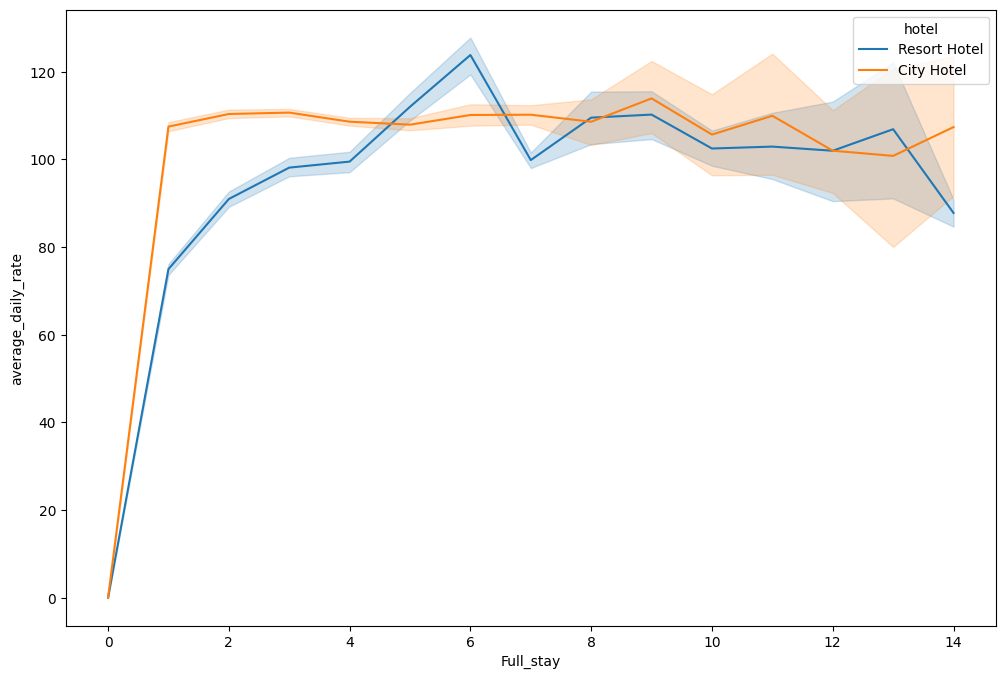

In [ ]:
not_canceled = Hotel_df[Hotel_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        #taking less than 15 days of Full stay
plt.figure(figsize =(12,8))
sns.lineplot(data = Hotel_df, x = s1['Full_stay'], y = 'average_daily_rate', hue = 'hotel')
plt.show()

After 2 days average_daily_rate for both the hotels is in range 100 to 130. To get min. average_daily_rate for resort hotel you should plan a stay of 6-7 days. For city hotels is almost constant. And average_daily_rate goes down after 14 days(long stay).

# Cancellation rates

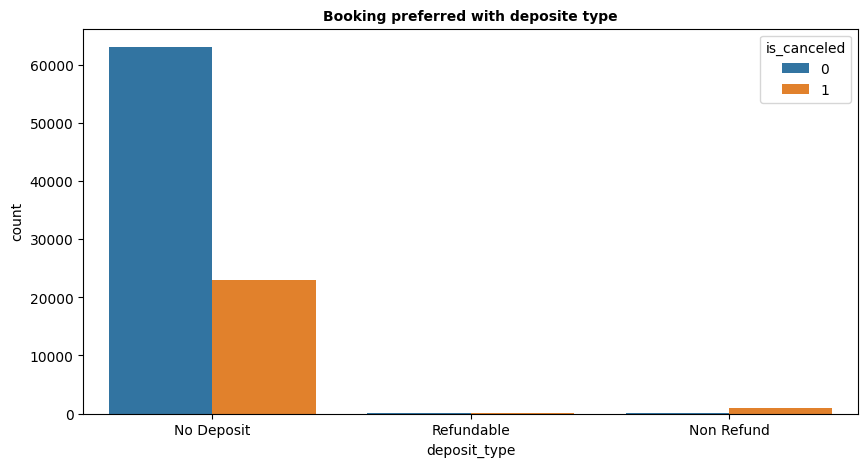

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontweight ="bold",size =10)
plt.show()

As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings.

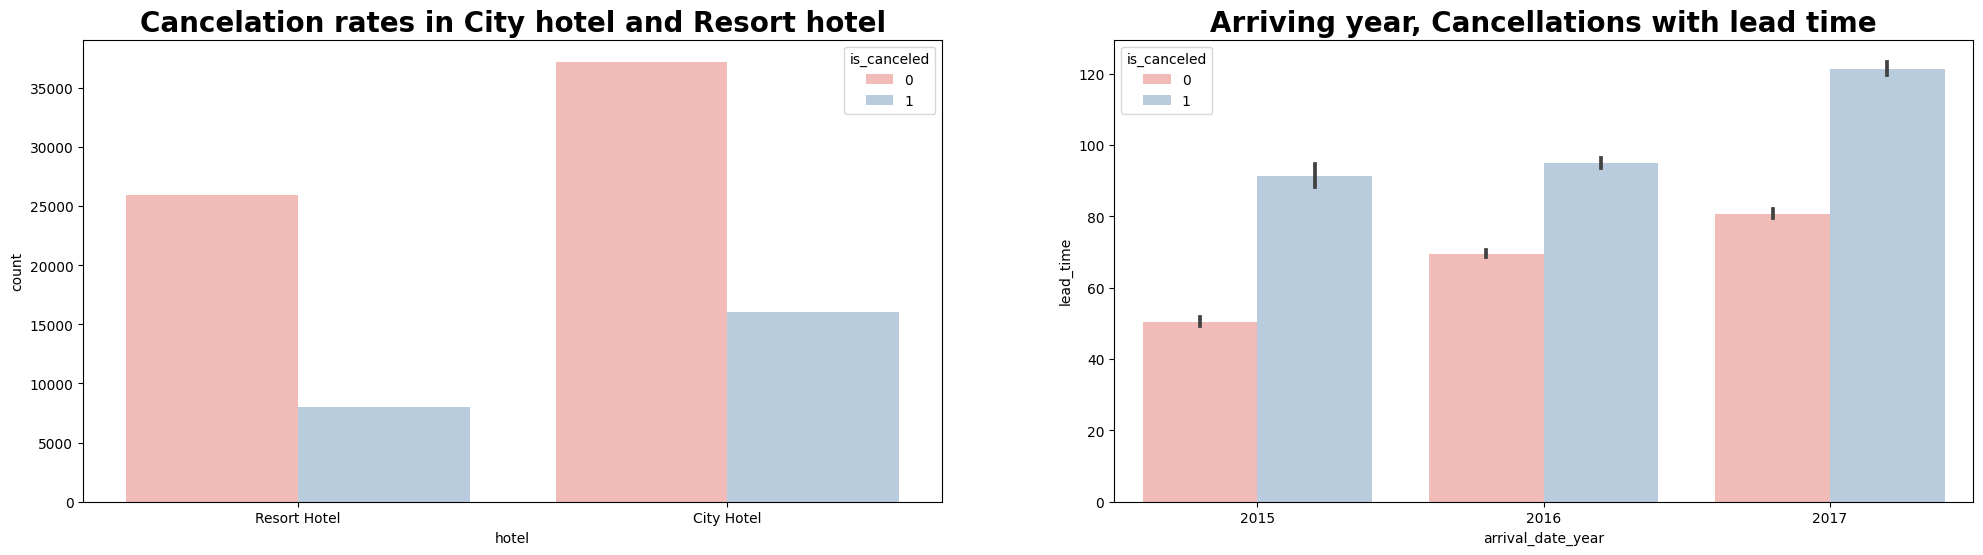

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation.

# Waiting time

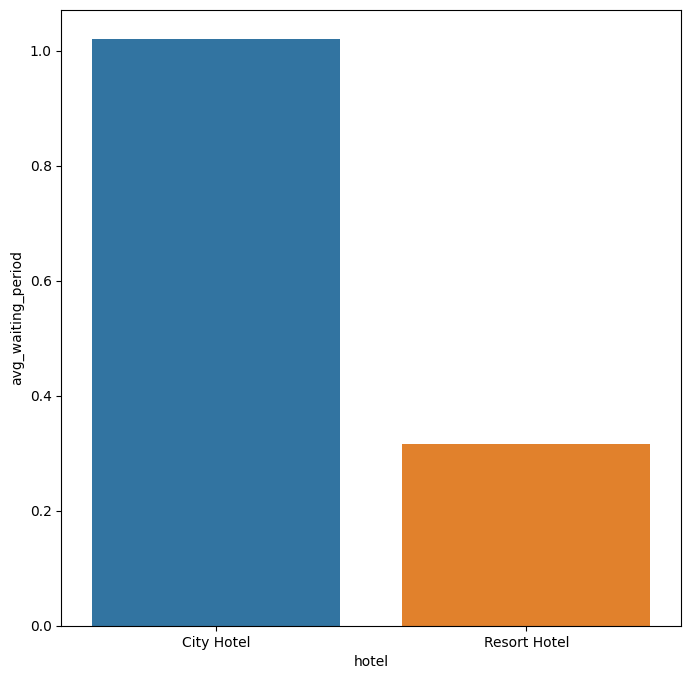

In [ ]:
grouped_by_hotel = Hotel_df.groupby('hotel') #creating a DF which store groupby 'Hotel' rows
# waiting_df which stores mean of days in waiting list column
Waiting_df = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,8))
sns.barplot(x = Waiting_df['hotel'], y = Waiting_df['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

# average_daily_rate and price

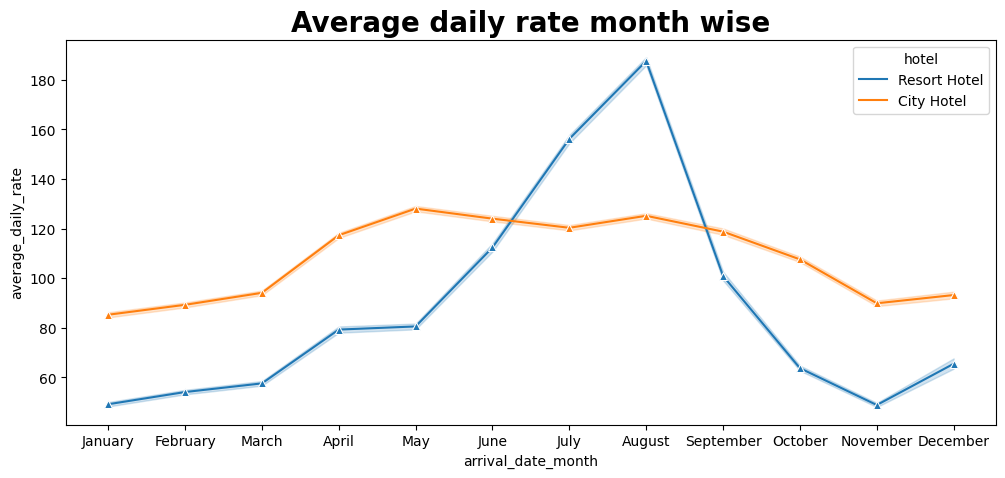

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_df, x = 'arrival_date_month', y = 'average_daily_rate', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontweight ='bold',size =20)
plt.show()

For resort hotels, the average daily rate is more expensive during august, july and september.

For city hotels, the average daily rate is more expensive during august, july, june and may.

<ipython-input-50-e70c7b5fae82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Actual_guests['price'] = Actual_guests['average_daily_rate'] * (Actual_guests['Full_stay'])


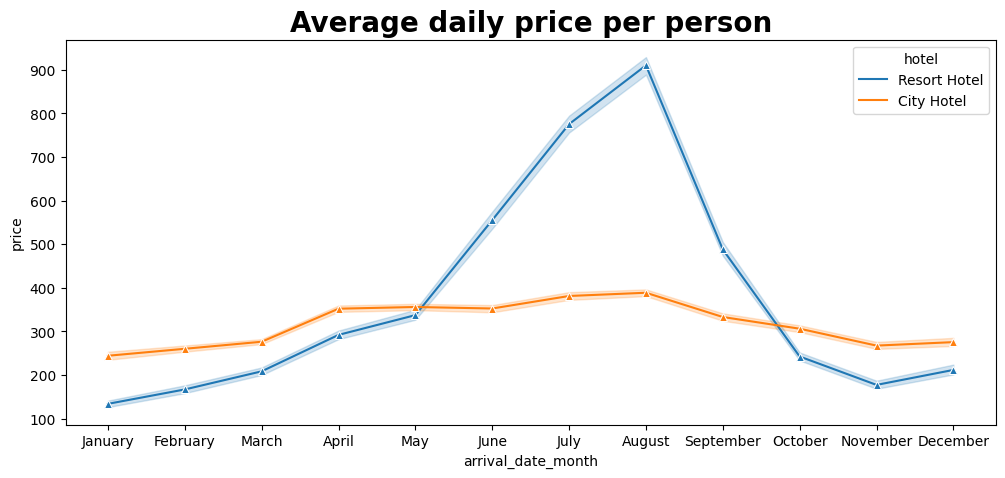

In [ ]:
plt.figure(figsize=(12,5))
# Calculating average daily rate per person
Hotel_df['Average_Daily_rate_pp'] = Hotel_df['average_daily_rate'] / (Hotel_df['adults'] + Hotel_df['children'])
Actual_guests = Hotel_df.loc[Hotel_df["is_canceled"] == 0]
Actual_guests['price'] = Actual_guests['average_daily_rate'] * (Actual_guests['Full_stay'])
sns.lineplot(data = Actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel', marker ='^')
plt.title('Average daily price per person',fontweight ='bold', size =20)
plt.show()

Prices of resort hotel are much higher during May,June,July,August,September

Prices of city hotel do not fluctuate that much.

# Special Requests

In [ ]:
Hotel_df['total_of_special_requests'].value_counts()

0    43788
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

Text(0.5, 0, 'No. of special requests')

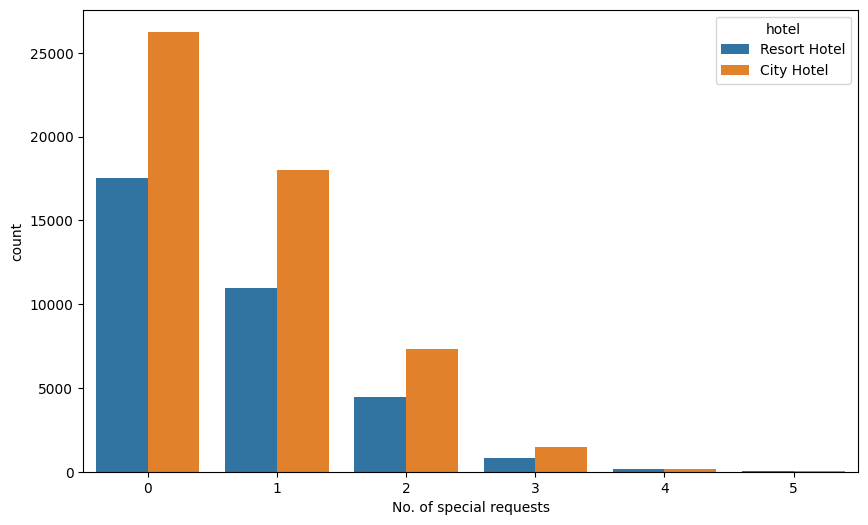

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(data =Hotel_df,x ='total_of_special_requests', hue ='hotel')
plt.xlabel('No. of special requests')

City hotels have more no. of special requests. Most of them ask for only 1 special request.

In [ ]:
Hotel_df.Total_members.sum()

176868

176868 total members have been registered in the hotels.

In [ ]:
Hotel_df.required_car_parking_spaces.sum()

7354

7354 car Parking spaces have been used.





# Conclusion

The majority of guests come from western europe countries.We should spend a significant amount of our budget on those area.

Around 61% bookings are for City hotel and 39% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel.

Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.

We should also target months between May to Aug. Those are peak months due to the summer period.

Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.

80% distribution_channel is TA/TO

Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

November,Descember, February And January are the months which has less booking so in this perios you can get rooms with less average daily rate. And Avoid most busiest months for hotels (May,June,July,August).